In [1]:
import numpy as np
from sklearn.metrics import pairwise_distances
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
def pam(X, k):
    n = len(X)  # Số lượng điểm dữ liệu
    medoids = np.random.choice(n, k, replace=False)  # Chọn ngẫu nhiên k điểm dữ liệu làm medoids ban đầu
    clusters = np.zeros(n)  # Mảng để lưu trữ cụm tương ứng cho mỗi điểm

    for _ in range(100):  # Tối đa 100 vòng lặp để tối ưu hóa medoids
        distances = pairwise_distances(X, X[medoids])  # Tính khoảng cách giữa các điểm và medoids hiện tại
        clusters = np.argmin(distances, axis=1)  # Gán mỗi điểm vào cụm có medoid gần nhất

        # Tính toán medoid mới cho mỗi cụm
        new_medoids = np.array([np.argmin(np.sum(distances[clusters == j], axis=0)) for j in range(k)])
        new_medoids = medoids[new_medoids]  # Chuyển đổi về chỉ số của dữ liệu gốc

        if np.all(medoids == new_medoids):  # Nếu không có thay đổi về medoids, dừng vòng lặp
            break
        medoids = new_medoids  # Cập nhật medoids cho vòng lặp tiếp theo

    return medoids, clusters

In [3]:
def claran(X, k, num_samples=5, sample_size=None):
    if sample_size is None:
        sample_size = min(40 + 2 * k, len(X))  # Xác định kích thước mẫu cho từng vòng lặp

    best_medoids = None  # Khởi tạo biến lưu trữ medoids tốt nhất tìm được
    best_cost = float('inf')  # Giá trị chi phí tốt nhất tìm được, khởi tạo vô cùng
    best_clusters = None  # Khởi tạo cụm tốt nhất tìm được

    for i in range(num_samples):
        if i == 0:
            # Lấy mẫu ngẫu nhiên từ dữ liệu trong lần đầu tiên
            sample_indices = np.random.choice(len(X), sample_size, replace=False)
        else:
            # Giữ lại medoids từ lần lặp trước để tinh chỉnh
            sample_indices = np.unique(np.append(best_medoids, np.random.choice(len(X), sample_size - len(best_medoids), replace=False)))

        sample = X[sample_indices]  # Tạo tập mẫu từ các chỉ số được chọn
        medoids, clusters = pam(sample, k)  # Chạy PAM trên tập mẫu để tìm medoids
        full_medoids = sample_indices[medoids]  # Ánh xạ medoids vào tập dữ liệu gốc

        full_distances = pairwise_distances(X, X[full_medoids])  # Tính khoảng cách trên toàn bộ tập dữ liệu
        full_clusters = np.argmin(full_distances, axis=1)  # Gán cụm cho mỗi điểm trong tập dữ liệu gốc
        cost = np.sum(np.min(full_distances, axis=1))  # Tính chi phí cho phân cụm hiện tại

        if cost < best_cost:  # Cập nhật kết quả tốt nhất nếu chi phí hiện tại thấp hơn
            best_medoids = full_medoids
            best_cost = cost
            best_clusters = full_clusters

    return best_medoids, best_clusters

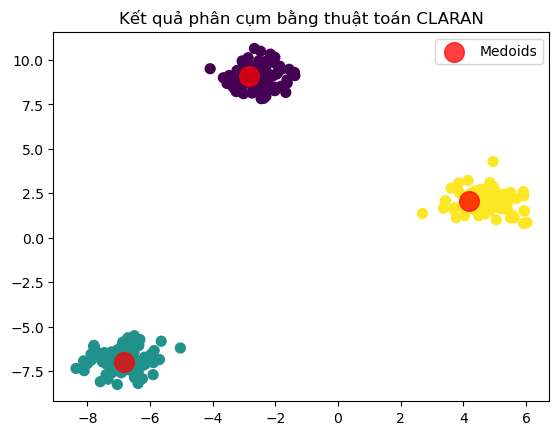

In [4]:
def test_claran():
    X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)  # Tạo dữ liệu giả lập
    k = 3  # Số cụm cần tìm
    medoids, clusters = claran(X, k)  # Thực hiện CLARAN trên dữ liệu
    plt.scatter(X[:, 0], X[:, 1], c=clusters, s=50, cmap='viridis')  # Vẽ điểm và các cụm
    plt.scatter(X[medoids, 0], X[medoids, 1], c='red', s=200, alpha=0.75, label='Medoids')  # Vẽ medoids
    plt.title("Kết quả phân cụm bằng thuật toán CLARAN")  # Tiêu đề
    plt.legend()  # Hiển thị chú thích
    plt.show()  # Hiển thị biểu đồ

test_claran()